In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd

In [94]:
DATASET = 'titanic.csv'

dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 8 columns):
pclass      890 non-null int64
sex         890 non-null int64
age         890 non-null float64
sibsp       890 non-null int64
parch       890 non-null int64
fare        890 non-null float64
embarked    890 non-null int64
survived    890 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.7 KB


In [95]:
dataset.iloc[:20, :]
# dataset.survived

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,24.0,0,0,7.7333,2,1
1,2,0,31.0,1,1,26.2500,1,1
2,3,1,1.0,4,1,39.6875,1,0
3,1,1,25.0,1,0,91.0792,0,1
4,3,1,27.0,0,0,7.8958,0,0
5,1,1,45.0,1,1,134.5000,0,1
6,3,1,19.0,0,0,8.1583,1,0
7,1,1,32.0,0,0,221.7792,1,0
8,2,1,29.0,0,0,0.0000,1,0
9,1,1,50.0,0,0,26.0000,1,0


In [98]:
from sklearn import tree
subset = dataset.sample(frac = .2).reset_index(drop = True)
X = np.array(subset.iloc[:, :-1])
Y = np.array(subset.survived)
model = tree.DecisionTreeClassifier()
model.fit(X, Y)
model.score(dataset.iloc[:, :-1], dataset.survived)

0.74044943820224718

In [119]:


# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                 [1, 2], [1, 3], [2, 3]]):

n_classes = 2
plot_colors = "rg"
plot_step = 0.02
# We only take the two corresponding features
W = np.array(X[:, [1,2]])
y = np.array(Y)

# Train
clf = tree.DecisionTreeClassifier().fit(W, y)



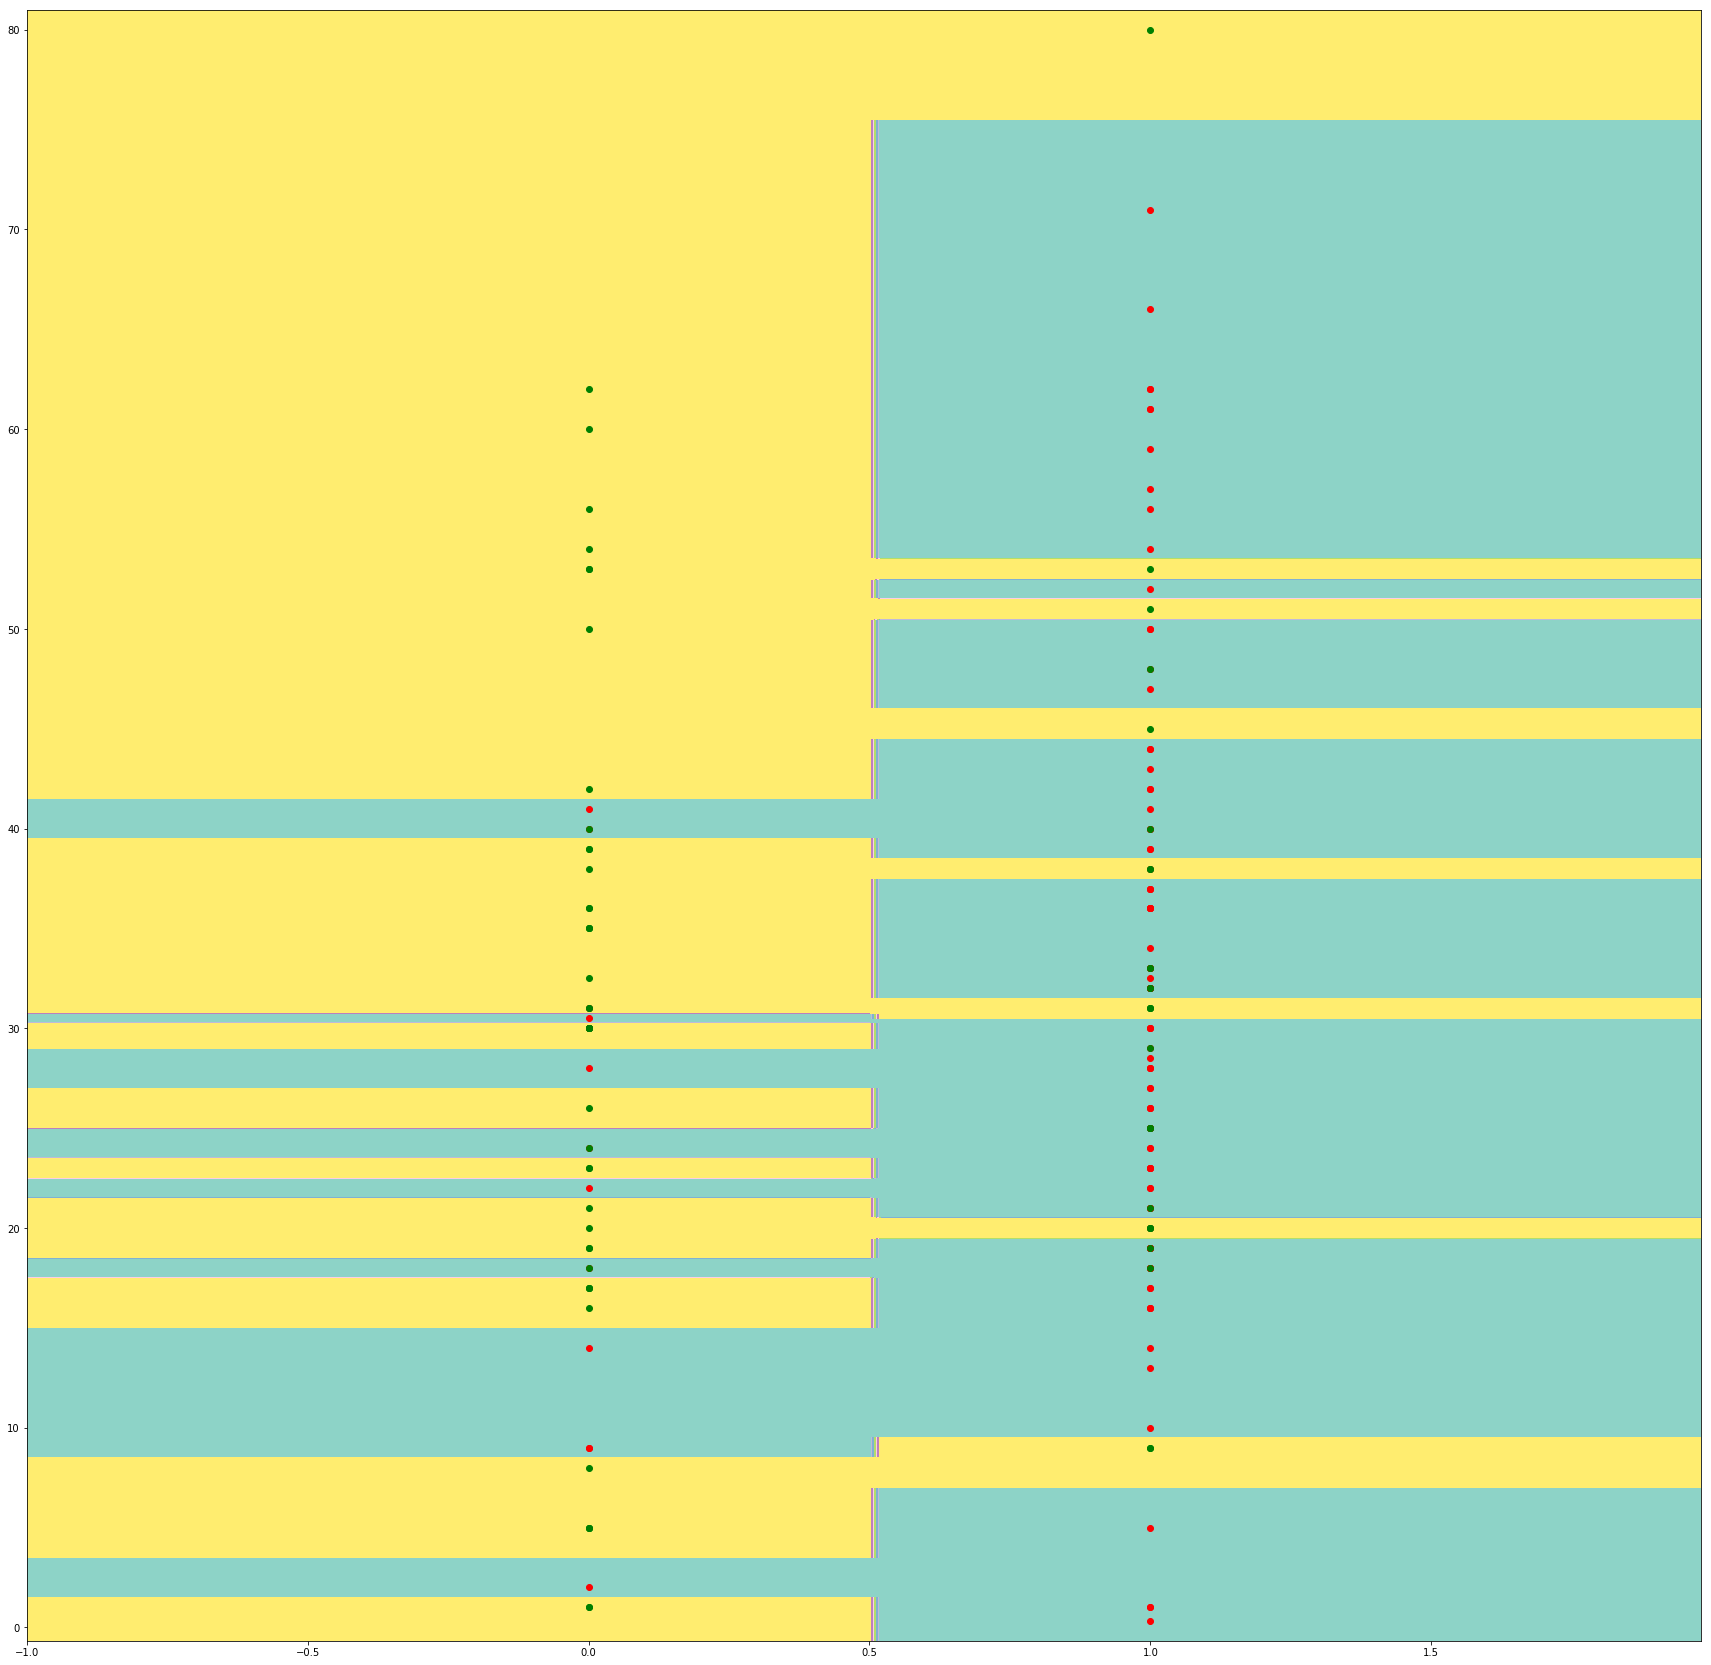

In [120]:
x_min, x_max = W[:, 0].min() - 1, W[:, 0].max() + 1
y_min, y_max = W[:, 1].min() - 1, W[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(30,30))
cs = plt.contourf(xx, yy, Z, cmap='Set3')

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(W[idx, 0], W[idx, 1], c=color)
                #cmap=plt.cm.Paired)


plt.show()

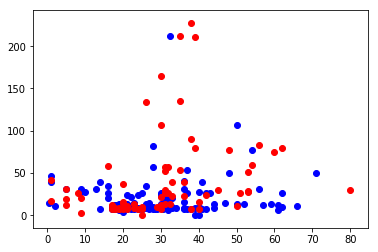

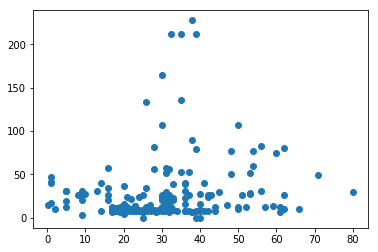

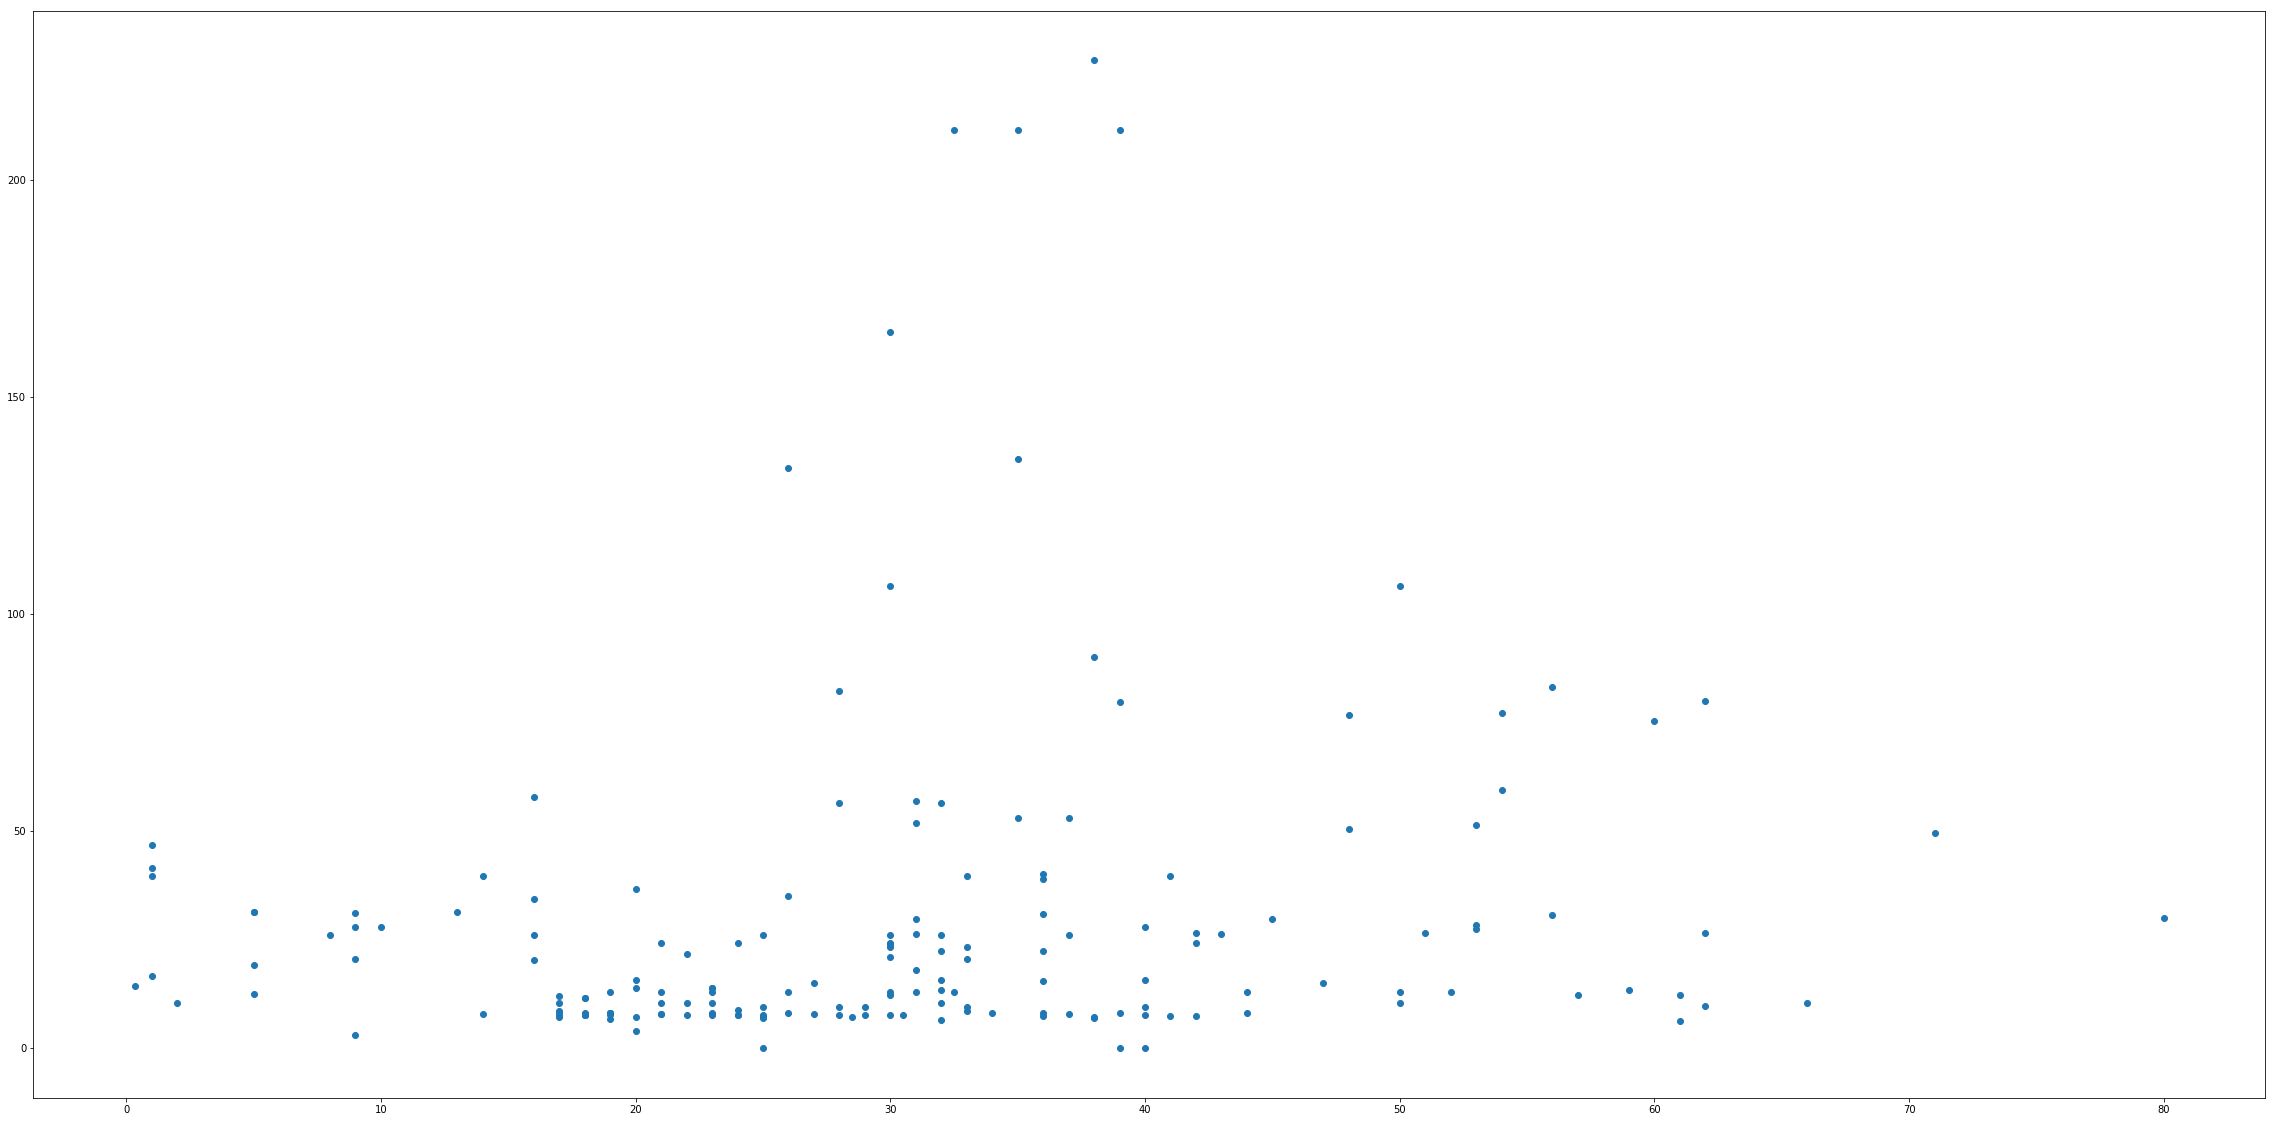

In [113]:
plt.figure(figsize=(40,20))
# plt.show()
plt.scatter(X[:, 2], X[:, 5])